# COURSE: PCA and multivariate neural signal processing
## SECTION: Linear algebra crash course
### VIDEO: Python: Vectors and matrices (work file)
#### Instructor: sincxpress.com

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


---
# Visualizing vectors
---


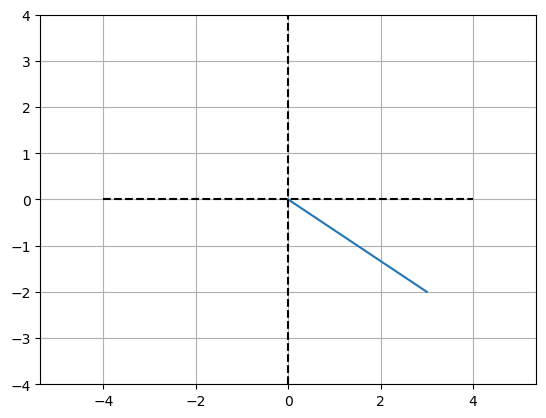

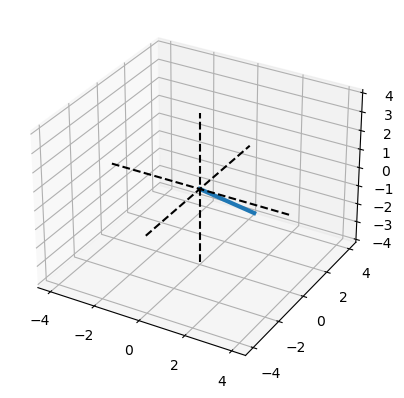

In [2]:

# 2-dimensional vector
v2 = [ 3, -2 ]

# 3-dimensional vector
v3 = [ 4, -3, 2 ]

# row to column (or vice-versa):
v3t = np.transpose(v3)


# plot them
plt.plot([0,v2[0]],[0,v2[1]])
plt.axis('equal')
plt.plot([-4, 4],[0, 0],'k--')
plt.plot([0, 0],[-4, 4],'k--')
plt.grid()
plt.axis((-4, 4, -4, 4))
plt.show()


# plot the 3D vector
fig = plt.figure(figsize=plt.figaspect(1))
ax = plt.axes(None, projection='3d')
ax.plot([0, v3[0]],[0, v3[1]],[0, v3[2]],linewidth=3)

# make the plot look nicer
ax.plot([0, 0],[0, 0],[-4, 4],'k--')
ax.plot([0, 0],[-4, 4],[0, 0],'k--')
ax.plot([-4, 4],[0, 0],[0, 0],'k--')
plt.show()

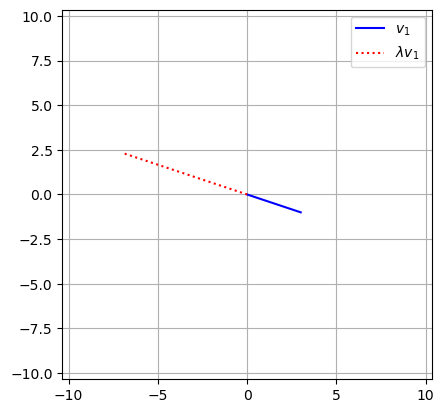

In [6]:
# Vector-scalar multiplication

# vector and scalar
v1 = np.array([ 3, -1 ])
l  = 2.3
v1m = v1*l # scalar-modulated

# plot them
plt.plot([0, v1[0]],[0, v1[1]],'b',label='$v_1$')
plt.plot([0, v1m[0]],[0, v1m[1]],'r:',label='$\lambda v_1$')

plt.legend()
plt.axis('square')
axlim = max([max(abs(v1)),max(abs(v1m))])*1.5 # dynamic axis lim
plt.axis((-axlim,axlim,-axlim,axlim))
plt.grid()
plt.show()


# QUESTION: What happens when the scalar is >1, <1, <0, and =0?
#Inverts direction

In [10]:
# Transpose operation

# note: for the .T method, we need to convert to numpy
v3 = np.array(v3)

print(v3)

# transpose
print(v3.T)

# double-transpose
print(v3.T.T)

# observe the sizes
print( np.shape( v3 ))
print( np.shape( v3.T ))


[[ 4]
 [-3]
 [ 2]]
[[ 4 -3  2]]
[[ 4]
 [-3]
 [ 2]]
(3, 1)
(1, 3)


In [9]:
# AAAHHHH!!! transposing didn't change it! That's because numpy distinguishes between 
# orientation-less and orientation vectors. So we need to "reshape" v3 to be a row vector.

v3 = np.reshape(v3,(-1,1))

# now repeat the code from the previous cell

---
# OMG it's the dot product!
---

In [16]:
## many ways to compute the dot product

v1 = np.array([ 1, 2, 3, 4, 5, 6 ])
v2 = np.array([ 0, 8, -3, 6, 5,1 ])

# the math
dp1 = v1.T @ v2

# the function
dp2 = np.dot(v1,v2)

print(dp1,dp2)


# QUESTION: Is the dot product affected by where you scalar-multiply?
#           To find out, create a scalar s and use it to multiply:
#           1) v1
#           2) v2
#           3) dot(v1,v2)
#           Do the results differ?


62 62


---
# Creating and working with matrices
---

In [29]:
# matrix sizes
m = 14
n = 8

# random matrix
A = np.random.randn(m,n)
print(np.shape(A))

(14, 8)


In [19]:
# MxM identity matrix
I = np.eye(m)
I

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [28]:
# diagonal
d  = [ 1, 2, 4, 9, 15 ]
D  = np.diag(d)
dd = np.diag(D)

print(D), print(' ')
print(d)


[[ 1  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0 15]]
 
[1, 2, 4, 9, 15]


In [30]:
# symmetric
S = A.T@A # you'll learn later why this is symmetric
print(np.shape(A)) # size of A
print(np.shape(S)) # size of S

# if the matrix is symmetric, then it should equal its transpose:
S.T - S

# QUESTION: We haven't yet discussed diagonal or symmetric matrices. 
#           But based on this code, what do you think are the definitions
#           of diagonal and symmetric matrices?
#           Hint: for symmetric matrices, think about the sizes of matrix
#           multiplications. 

(14, 8)
(8, 8)


array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [3]:

# create random matrices
A = np.random.randn(5,4)
B = np.random.randn(5,3)
C = np.random.randn(5,4)

# try to add them
A+B
A+C


<class 'ValueError'>: operands could not be broadcast together with shapes (5,4) (5,3) 

In [10]:
# scalar multiplication
M = np.round( np.random.randn(2,3)*10 )
s = 2

# compute and confirm that sM==Ms
M*np.array([s],ndmin=2) == np.array([s],ndmin=2)*M

array([[ True,  True,  True],
       [ True,  True,  True]])

---
# Matrix multiplications
---

In [17]:
## rules for multiplication validity

m = 4
n = 3
k = 6

# make some matrices
A = np.random.randn(m,n)
B = np.random.randn(n,k)
C = np.random.randn(m,k)

# test which multiplications are valid.
# Think of your answer first, then test.
np.matmul(A,B)
#np.matmul(A,A)
np.matmul(A.T,C)
np.matmul(B,B.T)
np.matmul(np.matrix.transpose(B),B)
#np.matmul(B,C)
#np.matmul(C,B)
#np.matmul(C.T,B)
np.matmul(C,B.T)

array([[-0.89987538, -0.39030079,  1.70578   ],
       [-0.71229086, -0.11455901,  1.0029027 ],
       [ 1.138016  , -2.72461241, -0.88002173],
       [ 2.14196202, -0.47811366,  3.66146075]])

In [18]:
# LIVE EVIL! (aka, order of operations)

n = 7
L = np.random.randn(n,n)
I = np.random.randn(n,n)
V = np.random.randn(n,n)
E = np.random.randn(n,n)

# result of "forward" multiplication and then transpose
res1 = np.matrix.transpose( L @ I @ V @ E )

# result of "flipped" multiplication of transposed matrices
res2 = E.T @ V.T @ I.T @ L.T

# test equality by subtracting (round to ignore possible computer rounding errors)
np.round( res1-res2 ,3)

array([[-0.,  0., -0., -0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -0., -0., -0.],
       [ 0.,  0.,  0.,  0., -0.,  0.,  0.],
       [-0.,  0.,  0.,  0., -0., -0.,  0.],
       [ 0.,  0.,  0.,  0., -0., -0.,  0.],
       [ 0.,  0.,  0., -0., -0., -0.,  0.],
       [-0.,  0., -0.,  0.,  0.,  0., -0.]])